In [4]:
import pandas as pd
import string
from helperFunctions import *
from matplotlib import pyplot as plt
import numpy as np

In [5]:
#change the path to the location of the tweets.csv file on your computer
df_tweets = pd.read_csv(r"C:\Users\andy\Downloads\tweets (2).csv")


In [6]:
df_tweets.head()

,content
0,Love it!
1,So awesome. Read my morning meditation anytime...
2,"Just replaced one add with another, albeit AA ..."
3,Don't bother upgrading. There is zero differen...
4,Every time I go to share the reading it pops u...


In [24]:
tweets = df_tweets['content'].tolist()
df_tweets.head()

,content
0,Love it!
1,So awesome. Read my morning meditation anytime...
2,"Just replaced one add with another, albeit AA ..."
3,Don't bother upgrading. There is zero differen...
4,Every time I go to share the reading it pops u...


In [46]:

import chardet

with open(r"C:\Users\andy\Downloads\common_abb_keyword (1).csv", 'rb') as f:
    result = chardet.detect(f.read())
    
df_abbreviations = pd.read_csv(r"C:\Users\andy\Downloads\common_abb_keyword (1).csv", encoding=result['encoding'])



In [47]:
df_abbreviations.head()

,Acronym,Expansion
0,2day,today
1,2m2h,too much too handle
2,2moro,tomorrow
3,2nite,tonight
4,4eae,for ever and ever


In [48]:
abbreviations_dict = df_abbreviations.set_index('Acronym')['Expansion'].to_dict()
abbreviations_dict

{'2day': 'today',
 '2m2h': 'too much too handle',
 '2moro': 'tomorrow',
 '2nite': 'tonight',
 '4eae': 'for ever and ever',
 'aaf': 'always and forever',
 'aar': 'at any rate',
 'aayf': 'as always your friend',
 'abd': 'already been done',
 'ack': 'acknowledge',
 'adih': 'another day in hell',
 'adn': 'any day now',
 'adr': 'all due respect',
 'aeap': 'as early as possible',
 'afaic': 'as far as i am concerned',
 'afaik': 'as far as i know',
 'aka': 'also known as',
 'ama': 'ask me anything against medical advice',
 'ambw': 'all my best wishes',
 'aml': 'all my love',
 'aota': 'all of the above',
 'asap': 'as soon as possible',
 'atb': 'all the best',
 'ateotd': 'at the end of the day',
 'atm': 'at the moment automated teller machine ',
 'awol': 'absent without leave',
 'aydy': 'are you done yet',
 'ayec': 'at your earliest convenience',
 'ayor': 'at your own risk',
 'ays': 'are you serious',
 'aysos': 'are you stupid or something',
 'ayt': 'are you there',
 'b/c': 'because',
 'b4': 'be

In [28]:
import string

class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None

    def height(self, node):
        if node is None:
            return 0
        return node.height

    def balance_factor(self, node):
        if node is None:
            return 0
        return self.height(node.left) - self.height(node.right)

    def left_rotate(self, x):
        y = x.right
        T2 = y.left

        y.left = x
        x.right = T2

        x.height = 1 + max(self.height(x.left), self.height(x.right))
        y.height = 1 + max(self.height(y.left), self.height(y.right))

        return y

    def right_rotate(self, y):
        x = y.left
        T2 = x.right

        x.right = y
        y.left = T2

        y.height = 1 + max(self.height(y.left), self.height(y.right))
        x.height = 1 + max(self.height(x.left), self.height(x.right))

        return x

    def insert(self, key, value):
        if self.root is None:
            self.root = Node(key, value)
            return self.root
        else:
            self.root = self._insert(self.root, key, value)
            return self.root

    def _insert(self, node, key, value):
        if node is None:
            return Node(key, value)
        elif key < node.key:
            node.left = self._insert(node.left, key, value)
        else:
            node.right = self._insert(node.right, key, value)

        node.height = 1 + max(self.height(node.left), self.height(node.right))

        balance = self.balance_factor(node)

        if balance > 1 and key < node.left.key:
            return self.right_rotate(node)

        if balance < -1 and key > node.right.key:
            return self.left_rotate(node)

        if balance > 1 and key > node.left.key:
            node.left = self.left_rotate(node.left)
            return self.right_rotate(node)

        if balance < -1 and key < node.right.key:
            node.right = self.right_rotate(node.right)
            return self.left_rotate(node)

        return node

    def search(self, key):
        node = self._search(self.root, key)
        if node is None:
            return None
        return node.value

    def _search(self, node, key):
        if node is None:
            return None
        elif key == node.key:
            return node
        elif key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)


def replace_abbreviations(tweets, abbreviations_dict):
    results = []
    avl_tree = AVLTree()
    for key, value in abbreviations_dict.items():
        avl_tree.insert(key, value)

    for sentence in tweets:
        words = sentence.split()
        for i, word in enumerate(words):
            stripped_word = word.strip(string.punctuation)
            node = avl_tree.search(stripped_word.lower())
            if node is not None:
                words[i] = node + word[len(stripped_word):]
        results.append(" ".join(words))
    return results



In [52]:
n = 400000
results = replace_abbreviations(tweets[:n], abbreviations_dict)

#for i in range(n):
   # print(tweets[i])
    #print(results[i])

In [82]:
# Generate some evaluation points
#tVals is a list of values of possible number of tweets
tVals = [2**k for k in range(9)] 
tVals += [k*10 for k in range(20)]
tVals += [k*60 for k in range(2,50)]
tVals.sort() # put them in order
print(tVals)

[0, 1, 2, 4, 8, 10, 16, 20, 30, 32, 40, 50, 60, 64, 70, 80, 90, 100, 110, 120, 120, 128, 130, 140, 150, 160, 170, 180, 180, 190, 240, 256, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440, 1500, 1560, 1620, 1680, 1740, 1800, 1860, 1920, 1980, 2040, 2100, 2160, 2220, 2280, 2340, 2400, 2460, 2520, 2580, 2640, 2700, 2760, 2820, 2880, 2940]


In [83]:
tValsRec, timeValsRec = calculateTimeForEachN(replace_abbreviations, tVals, tweets, abbreviations_dict, numTrials=5)

C:\Users\andy\AppData\Local\Temp\ipykernel_7184\405959810.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(tValsRec, [  coeffs[3] +coeffs[2]*t + coeffs[1]*t**2 + coeffs[0]*(t**2)*(np.log(t)) for t in tValsRec], color="purple", label="polynomial fit")
C:\Users\andy\AppData\Local\Temp\ipykernel_7184\405959810.py:5: RuntimeWarning: invalid value encountered in double_scalars
  plt.plot(tValsRec, [  coeffs[3] +coeffs[2]*t + coeffs[1]*t**2 + coeffs[0]*(t**2)*(np.log(t)) for t in tValsRec], color="purple", label="polynomial fit")


Text(0.5, 1.0, 'Keyword Replacement Algorithm')

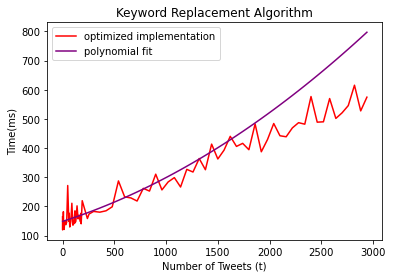

In [85]:
plt.plot(tValsRec, timeValsRec, color="red", label="optimized implementation")
# after we look at the data, change the False flag to True to fit a quadratic
if True:
    coeffs = np.polyfit( tValsRec, timeValsRec, 3 )
    plt.plot(tValsRec, [  coeffs[3] +coeffs[2]*t + coeffs[1]*t**2 + coeffs[0]*(t**2)*(np.log(t)) for t in tValsRec], color="purple", label="polynomial fit")
   
plt.xlabel("Number of Tweets (t)")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Keyword Replacement Algorithm")